# HR Data Analytics 

Berikut adalah analisa data turn over calon karyawan data science yang sudah di training dan untuk memprediksi karyawan apakah tetap ingin lanjut menjadi karyawan atau tidak dengan menggunakan metode **Random Forest**

## Import Library yang diperlukan

In [37]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [38]:
raw_data = pd.read_csv('aug_train.csv')

In [39]:
data = raw_data.copy()

# EDA

### a. Memahami Dataset

- 5 Baris Teratas
- Dimensi Dataset
- Nama Kolom
- Info Dataset
- Ringkasan Statistik Dataset

**5 baris terataws**

In [40]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Kesan : Banyak kolomm dengan jenis kategori data, terlihat beberapa *missing values*, Enrollee_id tidak dibutuhkan karna hanya berisi ID karyawan

**Dimensi Dataset**

In [41]:
data.shape

(19158, 14)

**Nama Kolom**

In [42]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

**Info Dataset**

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Kesan : kolom gender, enrolled univ, education level, major discipline, experience, company size, company type, dam last new training terdapat missing values

In [44]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


### b. Data Cleaning

- Hapus baris duplikasi
- Isi Missing Values

**Hapus baris duplikasi**

In [45]:
data.duplicated().sum()

0

kesan : Tidak ditemukan baris yang terduplikasi

**Mengisi Missing Values**

In [46]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [47]:
columns=[column for column in data.columns]

In [48]:
columns

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

### c. Mengisi missing values

In [49]:
for column in columns:
    if data[column].isnull().sum()>0:
        data[column].replace(np.nan,data[column].mode()[0],inplace=True)

In [50]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### d. Visualisasi Data

5 visualisasi dasar untuk observasi data

- Count Plot : Untuk melihat apakah data seimbang atau tidak
- Histograms : Untuk melihat apakah data *skewed*
- Box Plot : Untuk mendeteksi keberadaan *Outliers*

**countplot**

<AxesSubplot:xlabel='target', ylabel='count'>

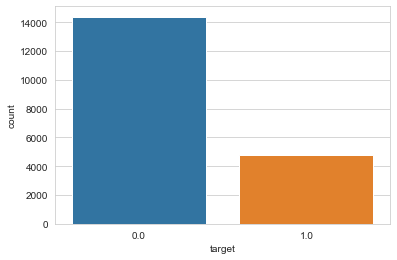

In [51]:
sns.countplot('target', data = data)

Kesan : Didapatkan data yang tidak seimbang antara karyawan yang tidak ganti pekerjaan dengan yang ganti pekerjaan

**histogram**

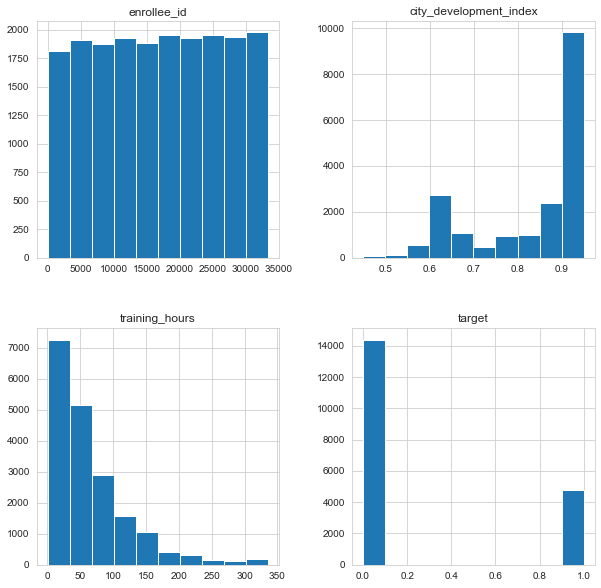

In [52]:
data.hist(bins=10,figsize=(10,10))
plt.show()

**boxplot**

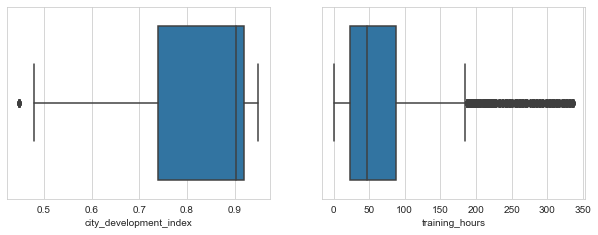

In [53]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='city_development_index',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='training_hours',data=data)
plt.show()

### Encoding Data

Encoding data dilakukan untuk mengubah data yang berbentuk categorical menjadi numerical agar bisa digunakan untuk proses selanjutnya

#### Label Encoding

- Label Encoding dilakukan apabila data yang bersifat katagory memiliki sifat ordinal (memiliki nilai ranking) contoh : pendidikan -> SD,SMP,SMA,Perguruan tinggi ; low, medium, high ; dsb 

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ordinal_cols=[ 'education_level',
       'major_discipline', 'experience', 'company_size',
       'last_new_job',"company_size"]
for column in ordinal_cols:
    data[column]=le.fit_transform(data[column])

In [55]:
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,0,5,21,4,Pvt Ltd,0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,0,5,6,4,Pvt Ltd,4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,0,5,15,4,Pvt Ltd,5,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,0,1,20,4,Pvt Ltd,5,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,2,5,21,4,Funded Startup,3,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,0,2,5,4,Pvt Ltd,0,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,0,5,5,4,Pvt Ltd,3,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,0,5,21,4,Pvt Ltd,3,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,1,5,20,5,Pvt Ltd,1,97,0.0


#### One Hot Encoding

- One Hot Encoding dilakukan untuk mengubah data yang bersifat categorical menjadi beberapa kolom dengan masing-masing *unique value* yang ada pada kolom tersebut
- One Hot Encoding dilakukan apabila kolom yang bersifat kategori tidak bersifat *ordinal*, yaitu tidak terdapat ranking didalamnya, contoh : jenis kelamin -> L, P ; Provinsi -> Jateng, Jabar, Jatim ; dll

In [56]:
data=pd.get_dummies(data,columns=['gender',
       'relevent_experience','enrolled_university','company_type'],drop_first=True)

In [57]:
data.head()

,enrollee_id,city,city_development_index,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,city_103,0.920,0,5,21,4,0,36,1.0,1,0,0,0,1,0,0,0,0,1
1,29725,city_40,0.776,0,5,6,4,4,47,0.0,1,0,1,0,1,0,0,0,0,1
2,11561,city_21,0.624,0,5,15,4,5,83,0.0,1,0,1,0,0,0,0,0,0,1
3,33241,city_115,0.789,0,1,20,4,5,52,1.0,1,0,1,0,1,0,0,0,0,1
4,666,city_162,0.767,2,5,21,4,3,8,0.0,1,0,0,0,1,1,0,0,0,0


#### Drop Kolom yang tidak diperlukan

In [58]:
data = data.drop(['enrollee_id','city'],axis = 1)

## Mengatasi data yang tidak seimbang

Berdasarkan pengamatan menggunakan countplot didapat bahwa data tidak seimbang, kemunculan angka 1 jauh dibawah kemunculan angka 0, maka dari itu harus dilakukan balancing data

In [59]:
X = data.drop(['target'],axis = 1)

In [60]:
y = data['target']

In [61]:
y.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

didapatkan kemunculan angka 1 hanya 1/3 dari kemunculan angka 0

In [62]:
import imblearn

In [63]:
X

,city_development_index,education_level,major_discipline,experience,company_size,last_new_job,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,0,5,21,4,0,36,1,0,0,0,1,0,0,0,0,1
1,0.776,0,5,6,4,4,47,1,0,1,0,1,0,0,0,0,1
2,0.624,0,5,15,4,5,83,1,0,1,0,0,0,0,0,0,1
3,0.789,0,1,20,4,5,52,1,0,1,0,1,0,0,0,0,1
4,0.767,2,5,21,4,3,8,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,0,2,5,4,0,42,1,0,1,0,1,0,0,0,0,1
19154,0.920,0,5,5,4,3,52,1,0,0,0,1,0,0,0,0,1
19155,0.920,0,5,21,4,3,44,1,0,0,0,1,0,0,0,0,1
19156,0.802,1,5,20,5,1,97,1,0,0,0,1,0,0,0,0,1


In [64]:
data.isnull().sum()

city_development_index                        0
education_level                               0
major_discipline                              0
experience                                    0
company_size                                  0
last_new_job                                  0
training_hours                                0
target                                        0
gender_Male                                   0
gender_Other                                  0
relevent_experience_No relevent experience    0
enrolled_university_Part time course          0
enrolled_university_no_enrollment             0
company_type_Funded Startup                   0
company_type_NGO                              0
company_type_Other                            0
company_type_Public Sector                    0
company_type_Pvt Ltd                          0
dtype: int64

In [65]:
 from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)

In [66]:
y.value_counts()

1.0    14381
0.0    14381
Name: target, dtype: int64

## Train Test Split

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

### Scaling Data

In [69]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Decision Tree Classifier

### Tanpa Scaling

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_no_scale=dt.predict(X_test)

In [77]:
#performance check
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
print(classification_report(y_test,y_pred_no_scale))
cvs_dt=round(cross_val_score(dt,X,y,scoring="accuracy",cv=10).mean(),2)
print("Cross validation score for Decision Tree model is:",cvs_dt)

              precision    recall  f1-score   support

         0.0       0.76      0.75      0.76      3603
         1.0       0.75      0.77      0.76      3588

    accuracy                           0.76      7191
   macro avg       0.76      0.76      0.76      7191
weighted avg       0.76      0.76      0.76      7191

Cross validation score for Decision Tree model is: 0.76


### Dengan Scaling


In [78]:
dt.fit(X_train_scaled,y_train)
y_pred_scale=dt.predict(X_test_scaled)

In [79]:
#performance check
print(classification_report(y_test,y_pred_scale))
cvs_dt=round(cross_val_score(dt,X,y,scoring="accuracy",cv=10).mean(),2)
print("Cross validation score for Decision Tree model is:",cvs_dt)

              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      3603
         1.0       0.75      0.77      0.76      3588

    accuracy                           0.75      7191
   macro avg       0.75      0.75      0.75      7191
weighted avg       0.75      0.75      0.75      7191

Cross validation score for Decision Tree model is: 0.76


Text(0.5, 1.0, 'Confusion matrix- Decision Tree')

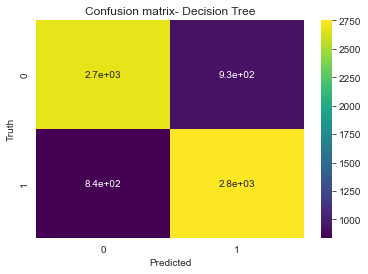

In [88]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred_scale),annot=True,cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion matrix- Decision Tree")

# Random Forest Classifier

### Tanpa Scaling

In [81]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf_no_scale=rf.predict(X_test)

In [82]:
#Performance check
print(classification_report(y_test,y_pred_rf_no_scale))
cvs_rf=round(cross_val_score(rf,X,y,scoring="accuracy",cv=10).mean(),2)
print("Cross validation score for Random Forest Classifier model is:",cvs_rf)

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      3603
         1.0       0.80      0.80      0.80      3588

    accuracy                           0.80      7191
   macro avg       0.80      0.80      0.80      7191
weighted avg       0.80      0.80      0.80      7191

Cross validation score for Random Forest Classifier model is: 0.8


### Dengan Scaling

In [84]:
rf.fit(X_train_scaled,y_train)
y_pred_rf_scale=rf.predict(X_test_scaled)

In [85]:
#Performance check
print(classification_report(y_test,y_pred_rf_scale))
cvs_rf=round(cross_val_score(rf,X,y,scoring="accuracy",cv=10).mean(),2)
print("Cross validation score for Random Forest Classifier model is:",cvs_rf)

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      3603
         1.0       0.80      0.80      0.80      3588

    accuracy                           0.80      7191
   macro avg       0.80      0.80      0.80      7191
weighted avg       0.80      0.80      0.80      7191

Cross validation score for Random Forest Classifier model is: 0.81


Text(0.5, 1.0, 'Confusion matrix- Random Forest Classifier')

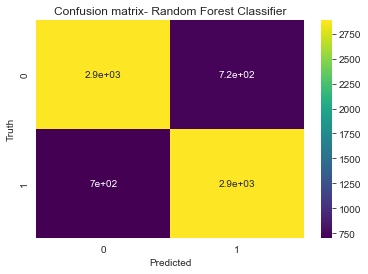

In [86]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred_rf_scale),annot=True,cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion matrix- Random Forest Classifier")